# Name : Adam Hafid Nurfalah

# Capstone Webscrapping using BeautifulSoup

Pada capstone project ini akan melakukan proses scraping data dari website `https://news.mifx.com`. untuk detail pengambilan datanya akan terfokuskan kepada kurs valuta asing `JPY`

Proses pengambilan data akan menggunakan library dari `Beautifulsoap`. setalah itu akan di ubah bentuknya ke dalamm dataframe. dan akan di visualisasikan menggunakan library python `matplotlib`. diharapkan pada analisa ini dapat menyampaikan insight kepada pembaca



In [15]:
import requests

url_get = requests.get('https://news.mifx.com/kurs-valuta-asing?kurs=JPY')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [16]:
url_get.content[1:777]

b'!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://news.mifx.com/" target="_self" />\n<title>Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini</title>\n<meta property="og:title" content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" />\n<meta name="description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />\n<meta property="og:description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: `Tag`, `NavigableString`, `BeautifulSoup`, and `Comment`. But at this module we will only use `BeautifulSoup`.

In [17]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. As you can see, the content is the same with our `get_url` object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 1045 character. 

In [18]:
print(soup.prettify()[:1045])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://news.mifx.com/" target="_self"/>
  <title>
   Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini
  </title>
  <meta content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" property="og:title"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " name="description"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " property="og:description"/>
  <meta content="Broker Terbaik, Trading Forex, Trading Teregulasi, Trading Online, Monex, mifx," name="keywords"/>
  <meta content="favicon.jpg?v=1570462055" property="og:image"/>
  <meta content="Ultimaen

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell.

Pada tahap ini akan memetakan bagian `HTML` yang akan di scraping menggunakan beautifulsoap. Di targetkan akan mengambil data `Tanggal`, `Ask` dan `Bid`. Maka, akan dilakukan pengambilan data dari `Table` dengan atribut class `centerText newsTable2`

In [22]:
table = soup.find('table', attrs={'class':'centerText newsTable2'})
print(table.prettify()[1:1000])

table cellpadding="10" cellspacing="0" class="centerText newsTable2" width="100%">
 <tr class="colorWhite fontsize14 firstRow">
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   06 Agustus 2020
  </td>
  <td>
   138,88
  </td>
  <td>
   137,48
  </td>
 </tr>
 <tr>
  <td>
   05 Agustus 2020
  </td>
  <td>
   139,23
  </td>
  <td>
   137,84
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   04 Agustus 2020
  </td>
  <td>
   139,19
  </td>
  <td>
   137,79
  </td>
 </tr>
 <tr>
  <td>
   03 Agustus 2020
  </td>
  <td>
   139,72
  </td>
  <td>
   138,32
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   30 Juli 2020
  </td>
  <td>
   140,16
  </td>
  <td>
   138,75
  </td>
 </tr>
</table>



Proses ini memfokuskan pada item `Tanggal`, `Ask` dan `Bid`

In [25]:
tr = table.find_all('tr')
tr[:2] # just call 2 founded tr

[<tr class="colorWhite fontsize14 firstRow">
 <td>TANGGAL</td>
 <td>ASK</td>
 <td>BID</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>06 Agustus 2020</td>
 <td>138,88</td>
 <td>137,48</td>
 </tr>]

In [27]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #get tanggal
    tanggal = row.find_all('td')[0].text
    tanggal = tanggal.strip() #for removing the excess whitespace
    
    #get ask
    ask = row.find_all('td')[1].text
    ask = ask.strip() #for removing the excess whitespace
    
    #get bid
    bid = row.find_all('td')[2].text
    bid = bid.strip() #for removing the excess whitespace

    
    temp.append((tanggal,ask,bid)) 
    
    
temp 

[('06\xa0Agustus\xa02020', '138,88', '137,48'),
 ('05\xa0Agustus\xa02020', '139,23', '137,84'),
 ('04\xa0Agustus\xa02020', '139,19', '137,79'),
 ('03\xa0Agustus\xa02020', '139,72', '138,32'),
 ('30\xa0Juli\xa02020', '140,16', '138,75')]

Put the array into dataframe

In [127]:
import pandas as pd
import dateparser

df = pd.DataFrame(temp, columns=('tanggal','ask','bid'))
df.head()

,tanggal,ask,bid
0,06 Agustus 2020,"138,88","137,48"
1,05 Agustus 2020,"139,23","137,84"
2,04 Agustus 2020,"139,19","137,79"
3,03 Agustus 2020,"139,72","138,32"
4,30 Juli 2020,"140,16","138,75"


Proses ini dilakukan untuk `Data cleaning` pada series `ask` dan `bid`. Untuk `,` akan di ubah menjadi `.` bertujuan untuk dapat mengubah data type menjadi float64

In [128]:
df['ask'] = df['ask'].str.replace(",",".")
df['bid'] = df['bid'].str.replace(",",".")
df[['ask','bid']] = df[['ask','bid']].astype('float64')
df['tanggal'] = df['tanggal'].str.replace("\xa0"," ")
#df['tanggal']=df['tanggal'].apply(dateparser.parse)

In [129]:
df.head()


,tanggal,ask,bid
0,06 Agustus 2020,138.88,137.48
1,05 Agustus 2020,139.23,137.84
2,04 Agustus 2020,139.19,137.79
3,03 Agustus 2020,139.72,138.32
4,30 Juli 2020,140.16,138.75


<AxesSubplot:>

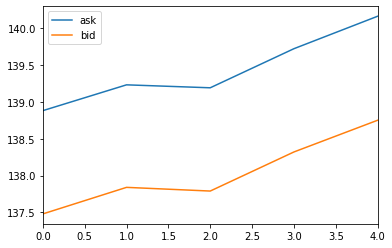

In [131]:
df.plot()

Trend pada `ask` dan `bid` cenderung naik, walaupun sempat melandai. dari grafik di atas dilihat bahwa `ask` selalu lebih tinggi di banding nilai `bid`